In [189]:
import pickle
from itertools import product
from functools import reduce
from collections import defaultdict

results = pickle.load(open('../final.pckl', 'rb'))

In [190]:
read_percentages = [50, 75, 90]
polygraph_sizes = range(100, 301, 50)
polygraph_dir = 'polygraphs/workloads3'

polygraphs = [f'{polygraph_dir}/chengR{read_percent}-{size}.polyg'
                for size, read_percent in product(polygraph_sizes, read_percentages)]

In [234]:
def total_time(timings):
    return reduce(lambda total, key: total + timings[key], timings, 0)

def results_by_encoding_for_percent(results, read_percent):
    encodings = reduce(lambda s, item: s | {item['encoding']}, results, set())
    by_encoding = defaultdict(list)
    for size in polygraph_sizes:
        for result in results:
            if result['polygraph'] == f'{polygraph_dir}/chengR{read_percent}-{size}.polyg':
                by_encoding[result['encoding']].append(total_time(result['result'][1]))
    
    return by_encoding

In [235]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
from cycler import cycler

In [289]:
def plot_by_encoding_for_percent(results, read_percent=50, exclude=[]):
    fig, ax = plt.subplots(figsize=(12, 12))

    rows = results_by_encoding_for_percent(results, read_percent)
    default_colors = cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
    ax.set_prop_cycle(default_colors * cycler(linestyle=['-', '--', ':',]))
    
    for enc in rows:
        if not enc in exclude:
            timing = np.pad(rows[enc], (0, 5 - len(rows[enc])), 'constant', constant_values=(math.inf))
            ax.scatter(polygraph_sizes, timing, )
            ax.plot(polygraph_sizes, timing, label=enc)
    
#     ax.set_yscale('log')
    ax.legend()

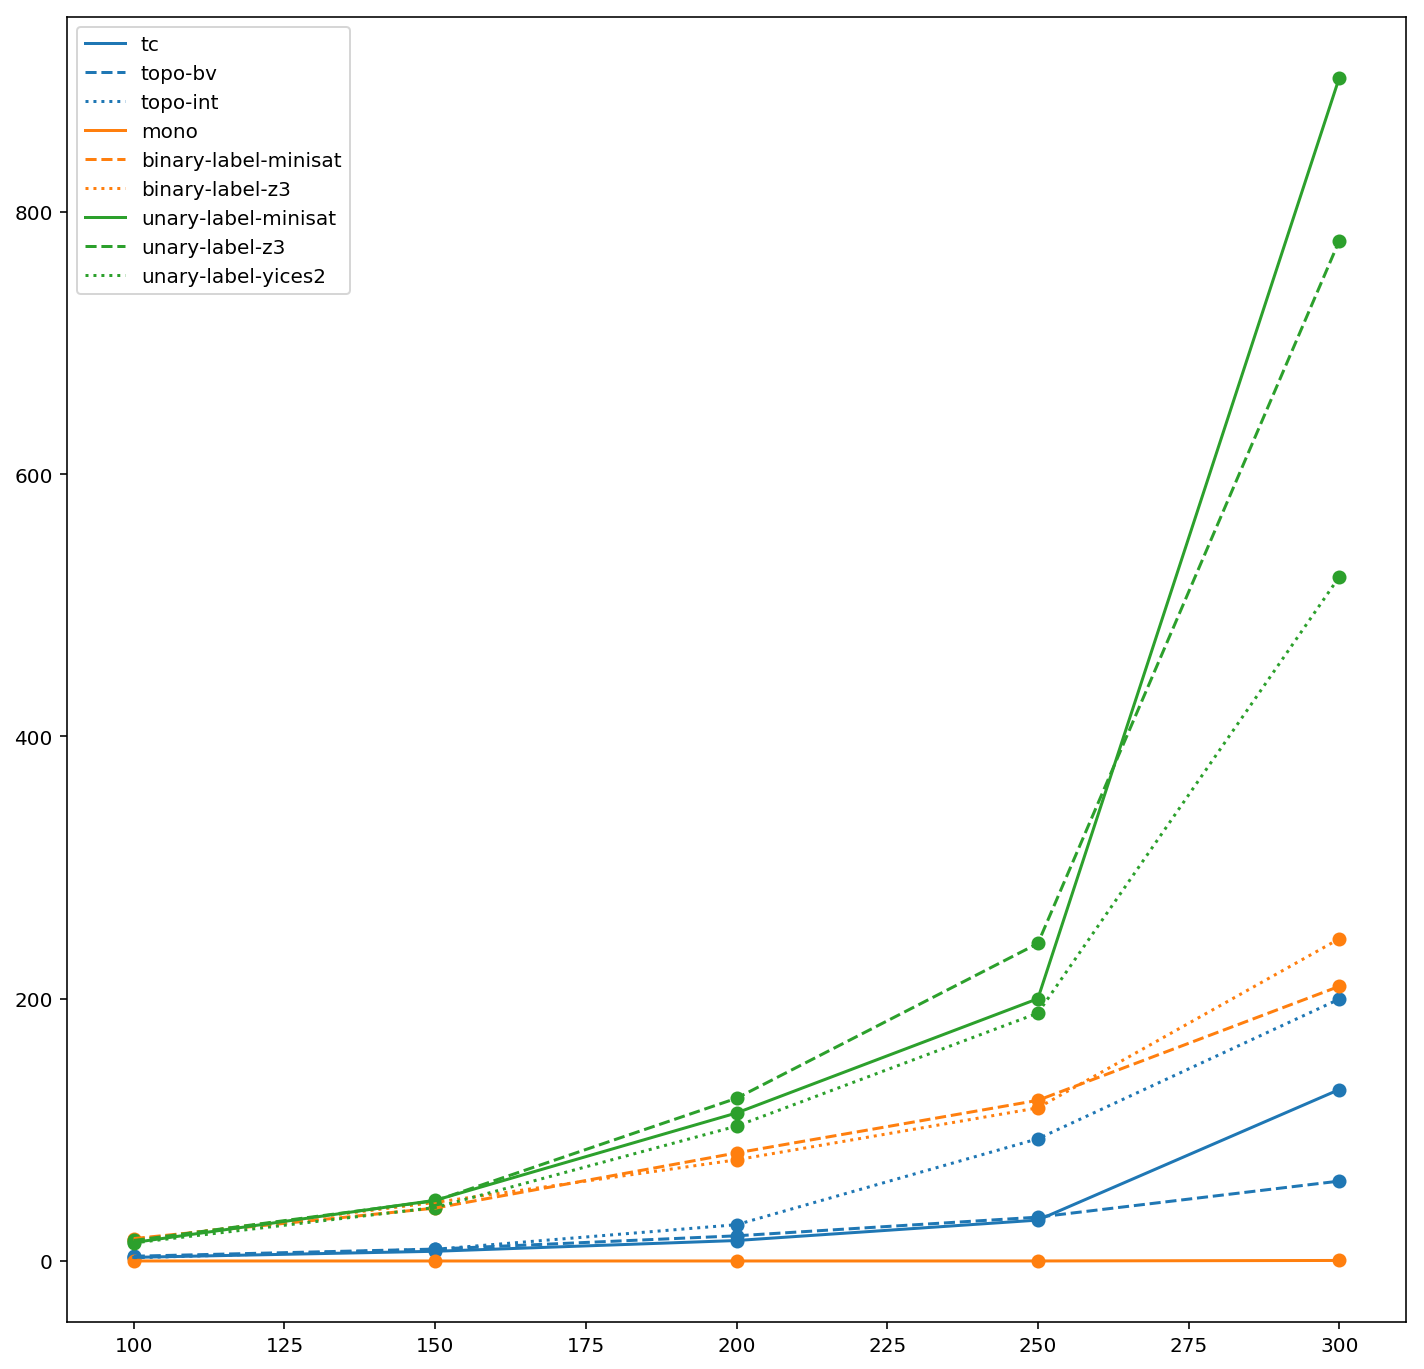

In [291]:
plot_by_encoding_for_percent(results, 50, ['tc1', 'tc3', 'tree-bv', 'axiom'])

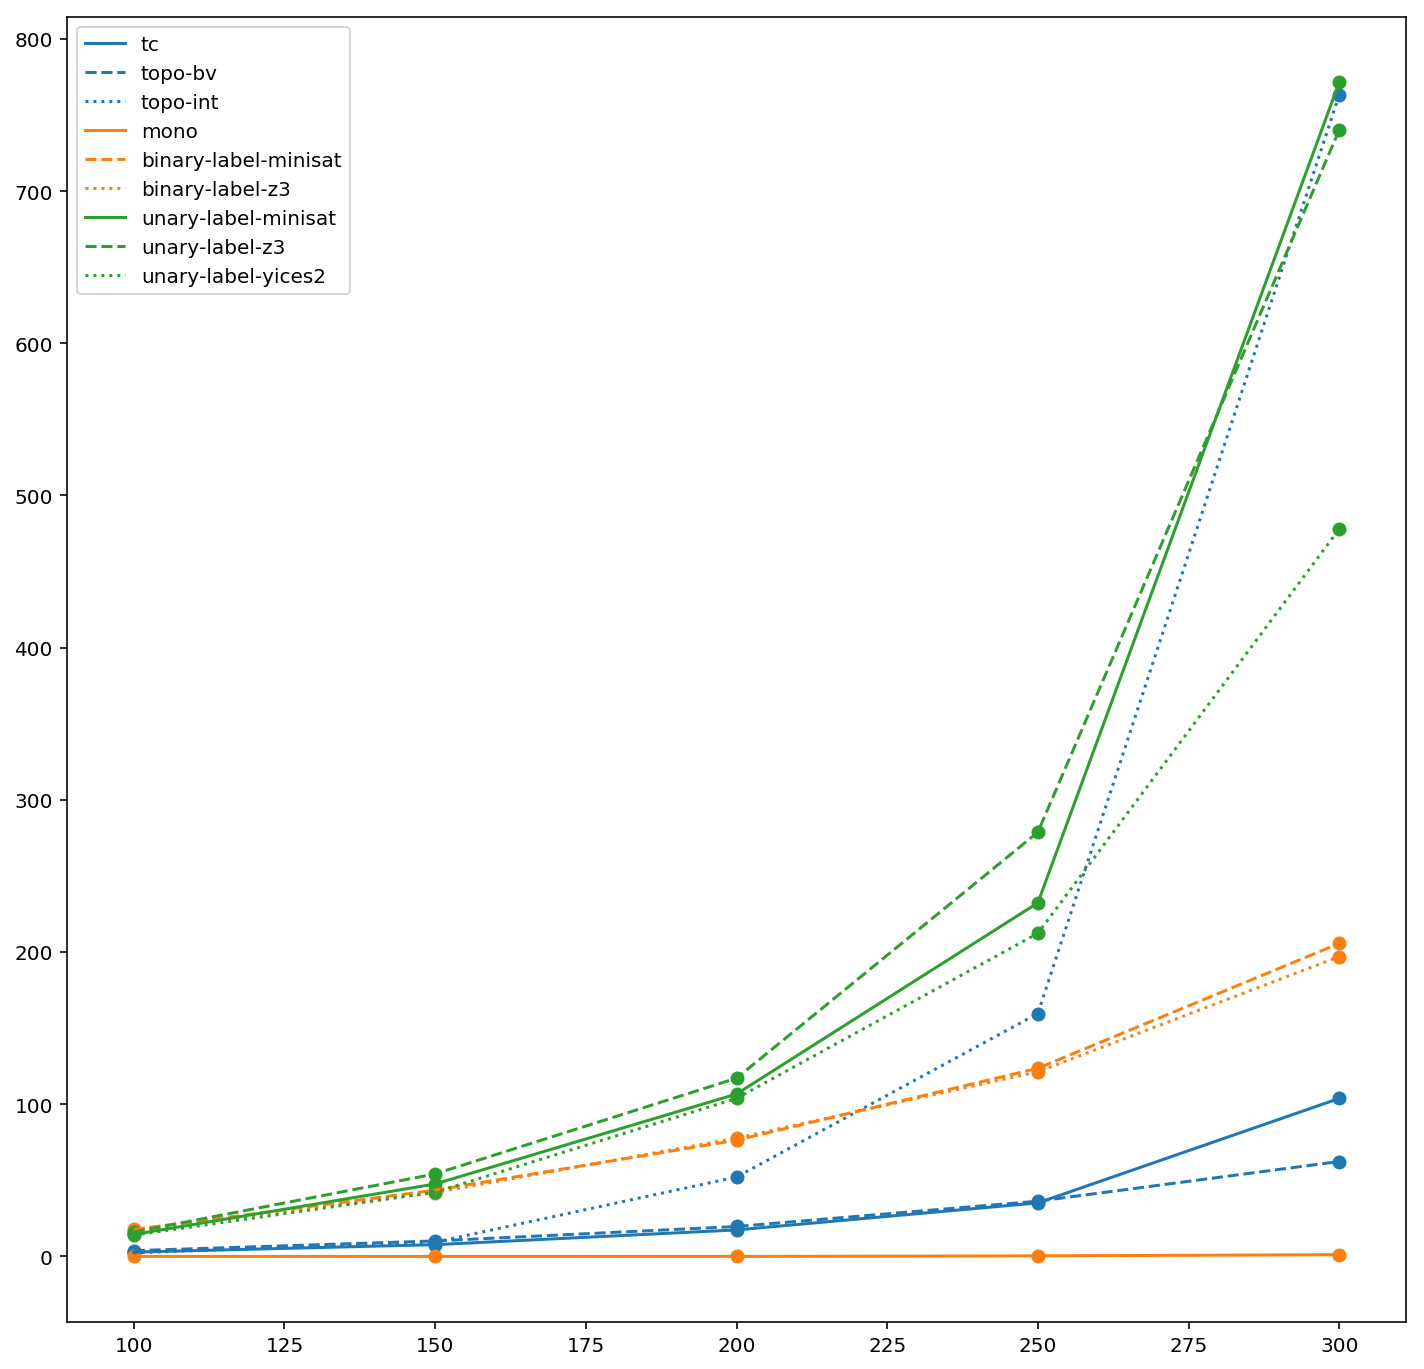

In [285]:
plot_by_encoding_for_percent(results, 75, ['tc1', 'tc3', 'tree-bv', 'axiom'])

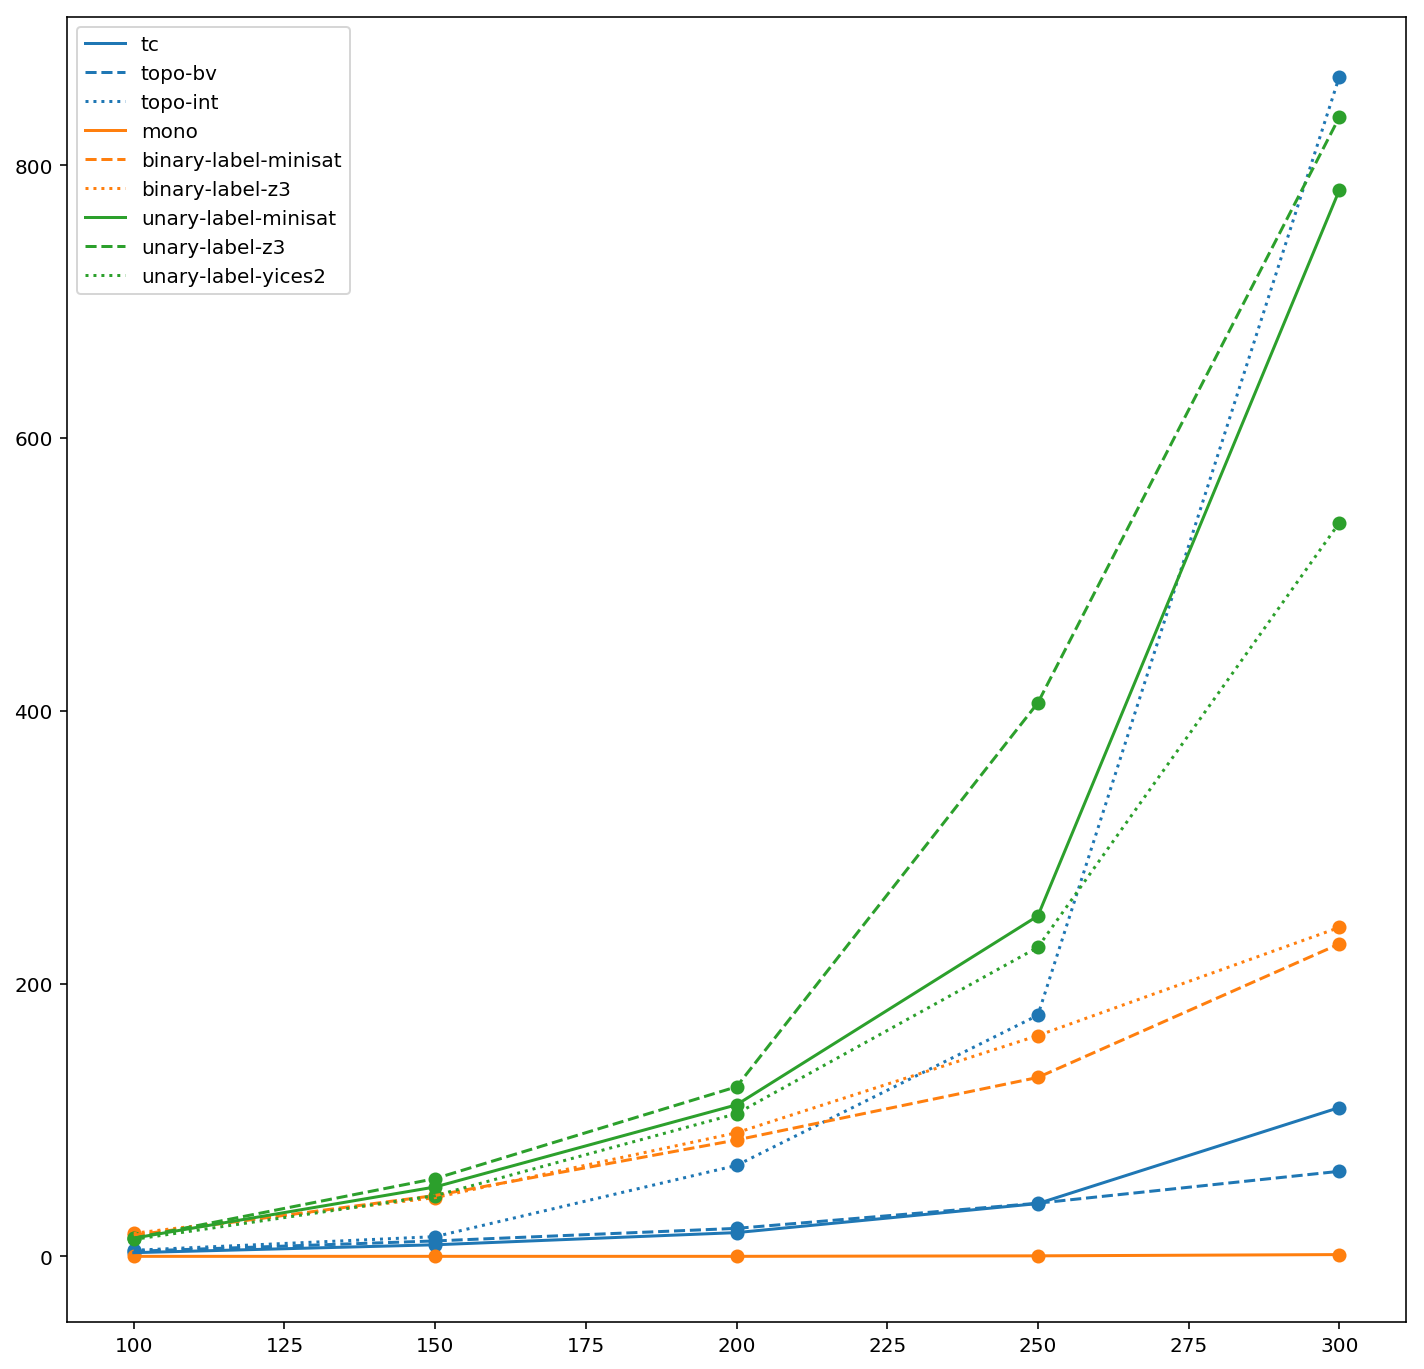

In [286]:
plot_by_encoding_for_percent(results, 90, ['tc1', 'tc3', 'tree-bv', 'axiom'])

In [260]:
def by_encoding(results, encoding):
    output = []
    
    for percent in read_percentages:
        rows = results_by_encoding_for_percent(results, percent)
        output.append(rows[encoding])
    
    return output

In [264]:
def plot_encoding(results, encoding):
    fig, ax = plt.subplots(figsize=(12, 12))
    rows = by_encoding(results, encoding)
    for row in rows:
        timing = np.pad(row, (0, 5 - len(row)), 'constant', constant_values=(math.inf))
        ax.plot(polygraph_sizes, timing)
    ax.legend(read_percentages)
        

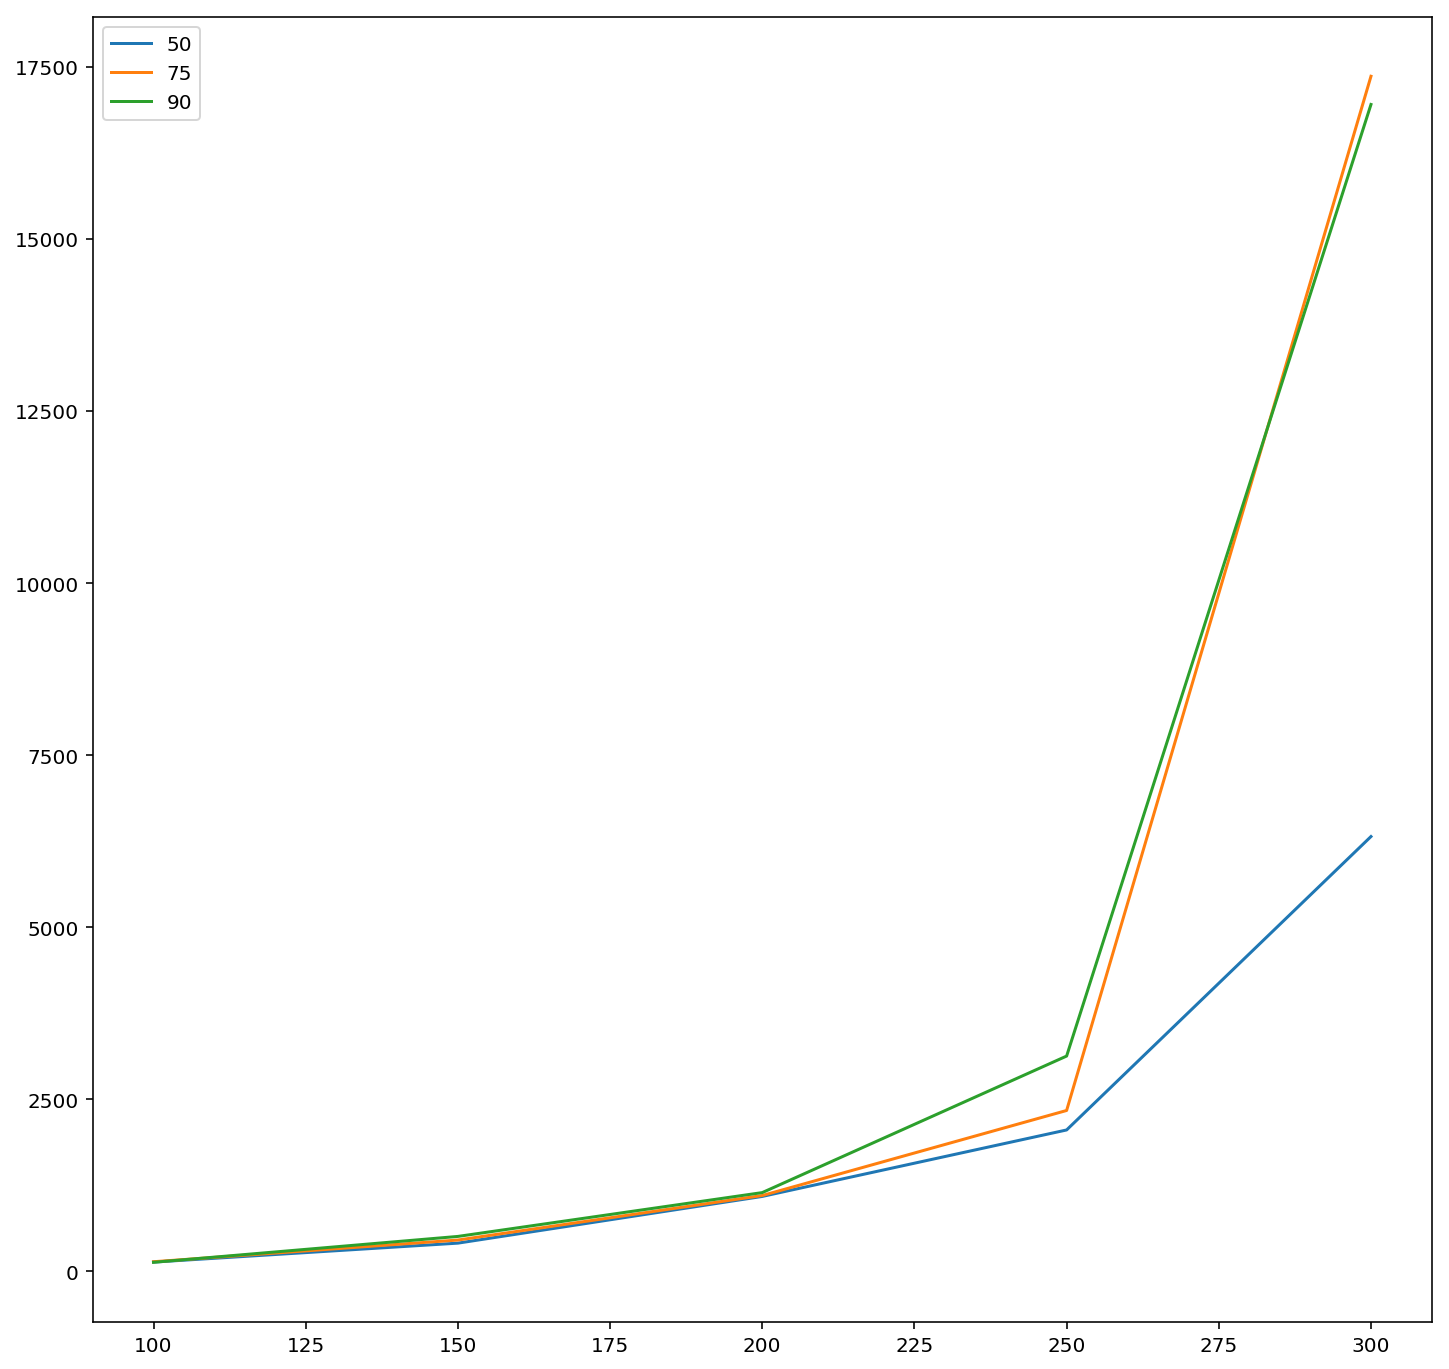

In [265]:
plot_encoding(results, 'tc1')

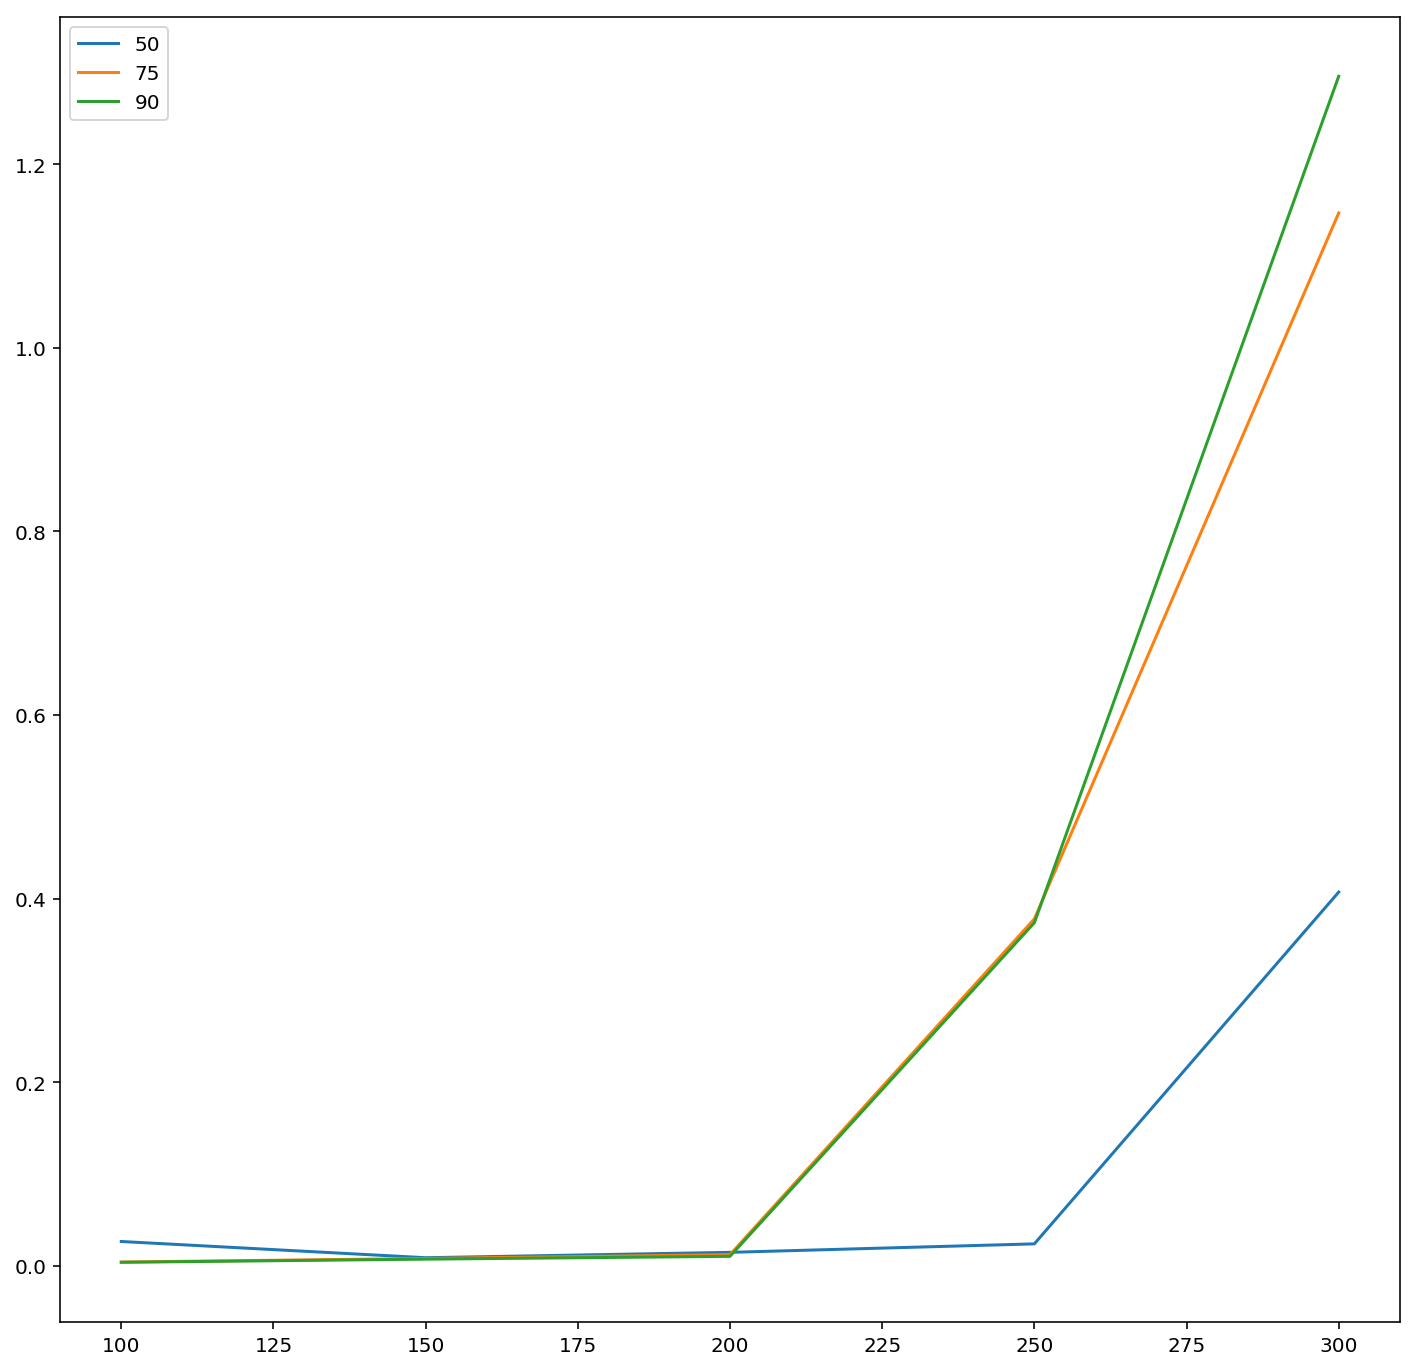

In [266]:
plot_encoding(results, 'mono')

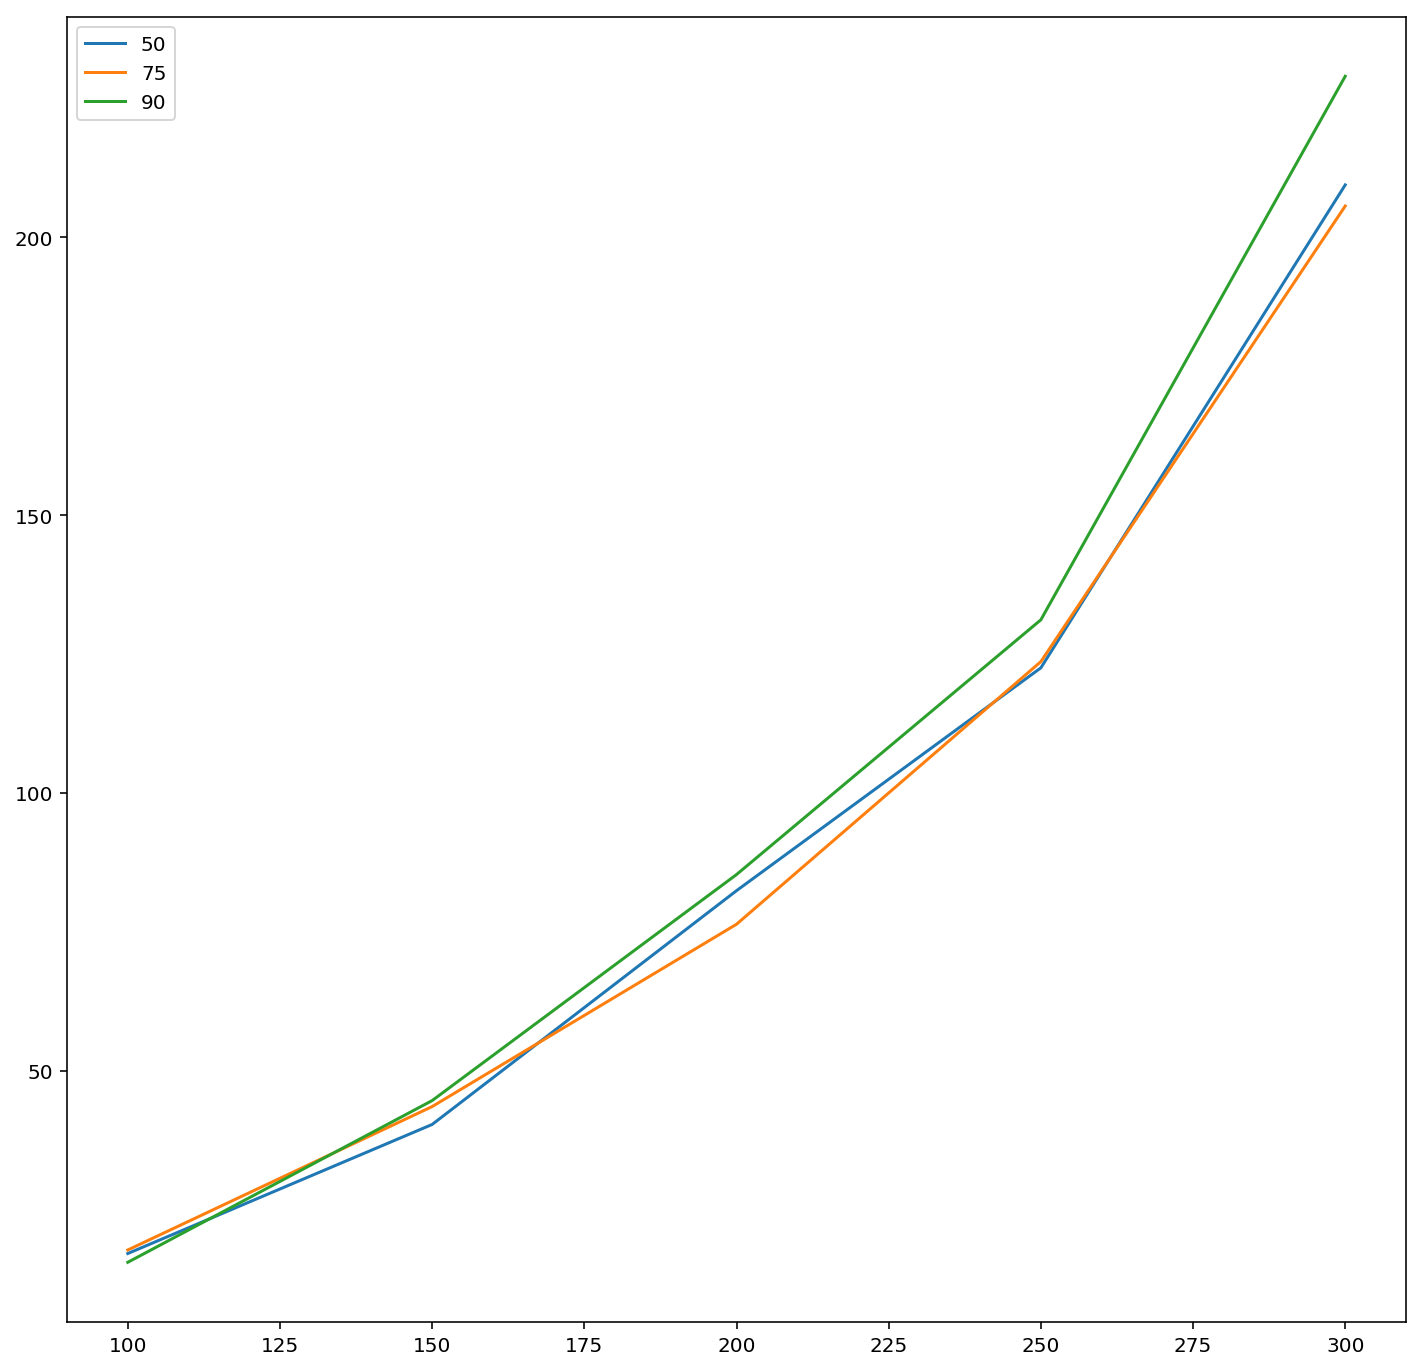

In [267]:
plot_encoding(results, 'binary-label-minisat')

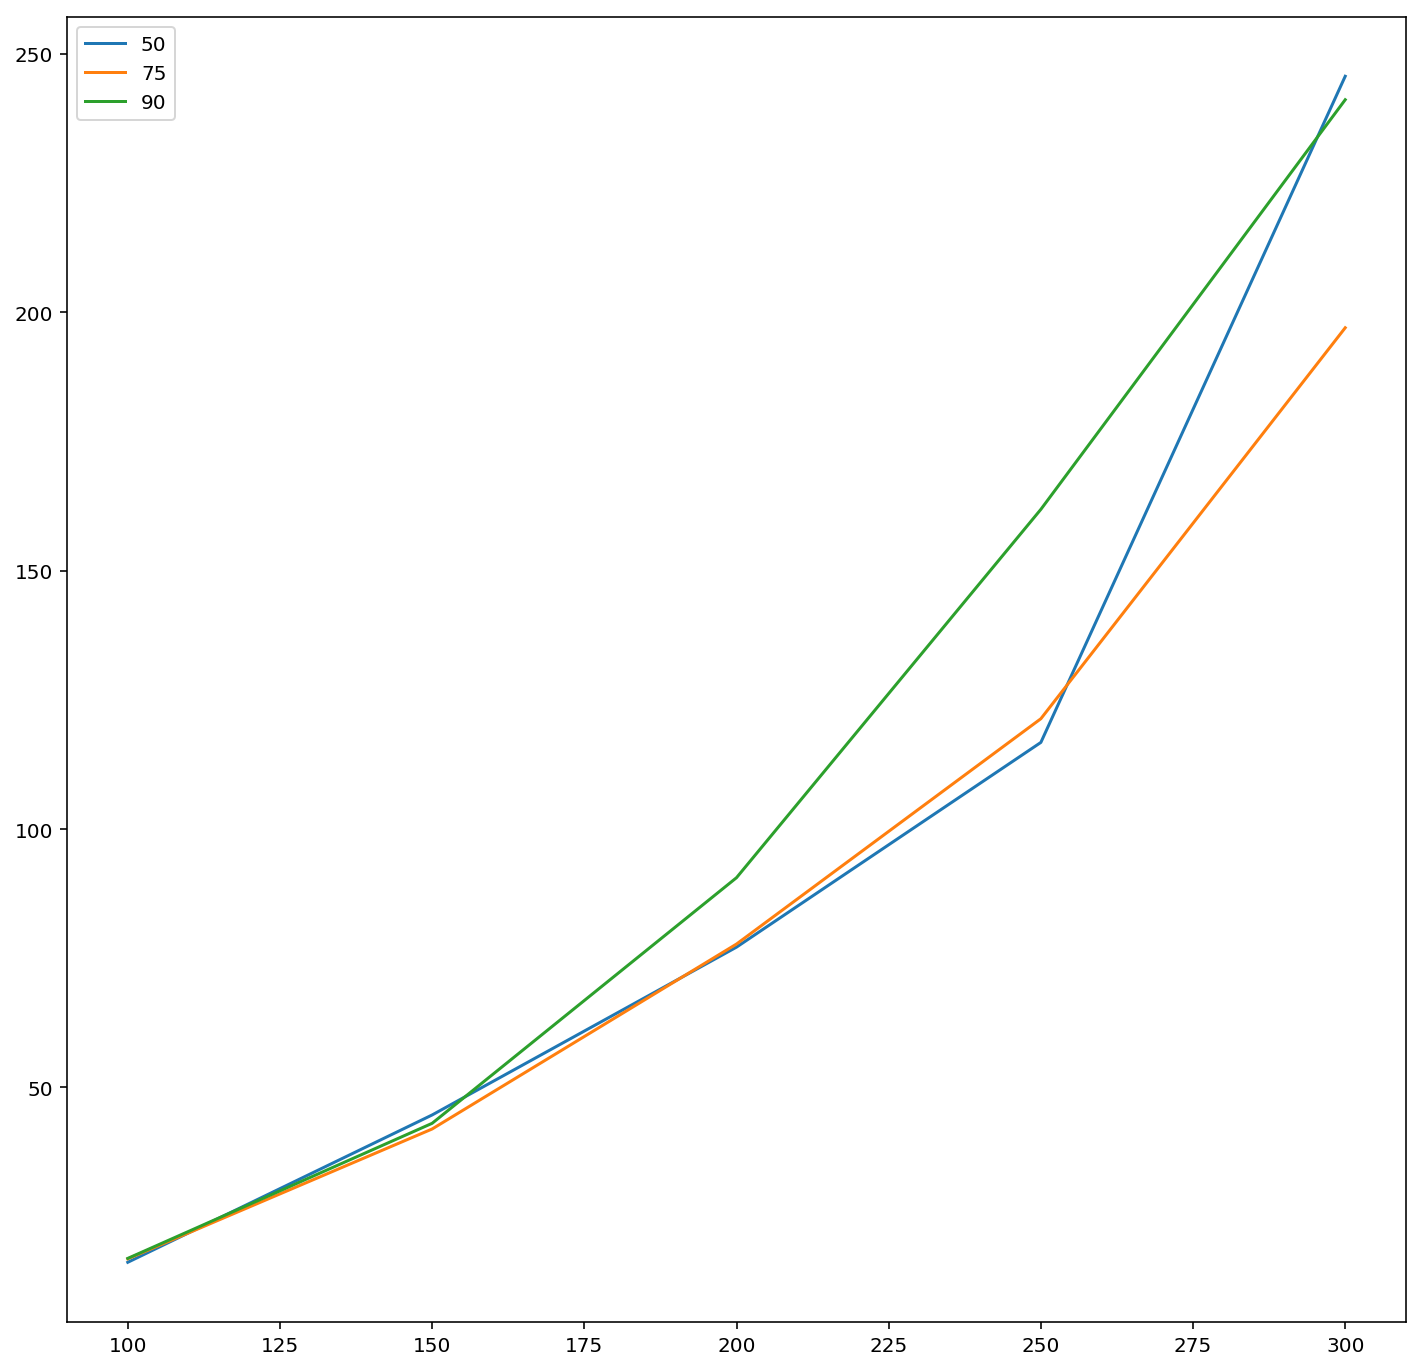

In [292]:
plot_encoding(results, 'binary-label-z3')

In [305]:
def encode_timing_for_percent(results, read_percent, timing):
    encodings = reduce(lambda s, item: s | {item['encoding']}, results, set())
    by_encoding = defaultdict(list)
    for size in polygraph_sizes:
        for result in results:
            if result['polygraph'] == f'{polygraph_dir}/chengR{read_percent}-{size}.polyg':
                by_encoding[result['encoding']].append(result['result'][1][timing])
    
    return by_encoding

In [306]:
def plot_encode_time_for_percent(results, read_percent=50, exclude=[]):
    fig, ax = plt.subplots(figsize=(12, 12))

    rows = encode_timing_for_percent(results, read_percent, 'encode')
    default_colors = cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
    ax.set_prop_cycle(default_colors * cycler(linestyle=['-', '--', ':',]))
#     cm = plt.get_cmap('gist_rainbow')
#     ax.set_prop_cycle(cycler(color=[cm(1.*i/len(rows)) for i in range(len(rows))]))
    
    for enc in rows:
        if not enc in exclude:
            timing = np.pad(rows[enc], (0, 5 - len(rows[enc])), 'constant', constant_values=(math.inf))
            ax.scatter(polygraph_sizes, timing)
            ax.plot(polygraph_sizes, timing, label=enc)
    
#     ax.set_yscale('log')
    ax.legend()

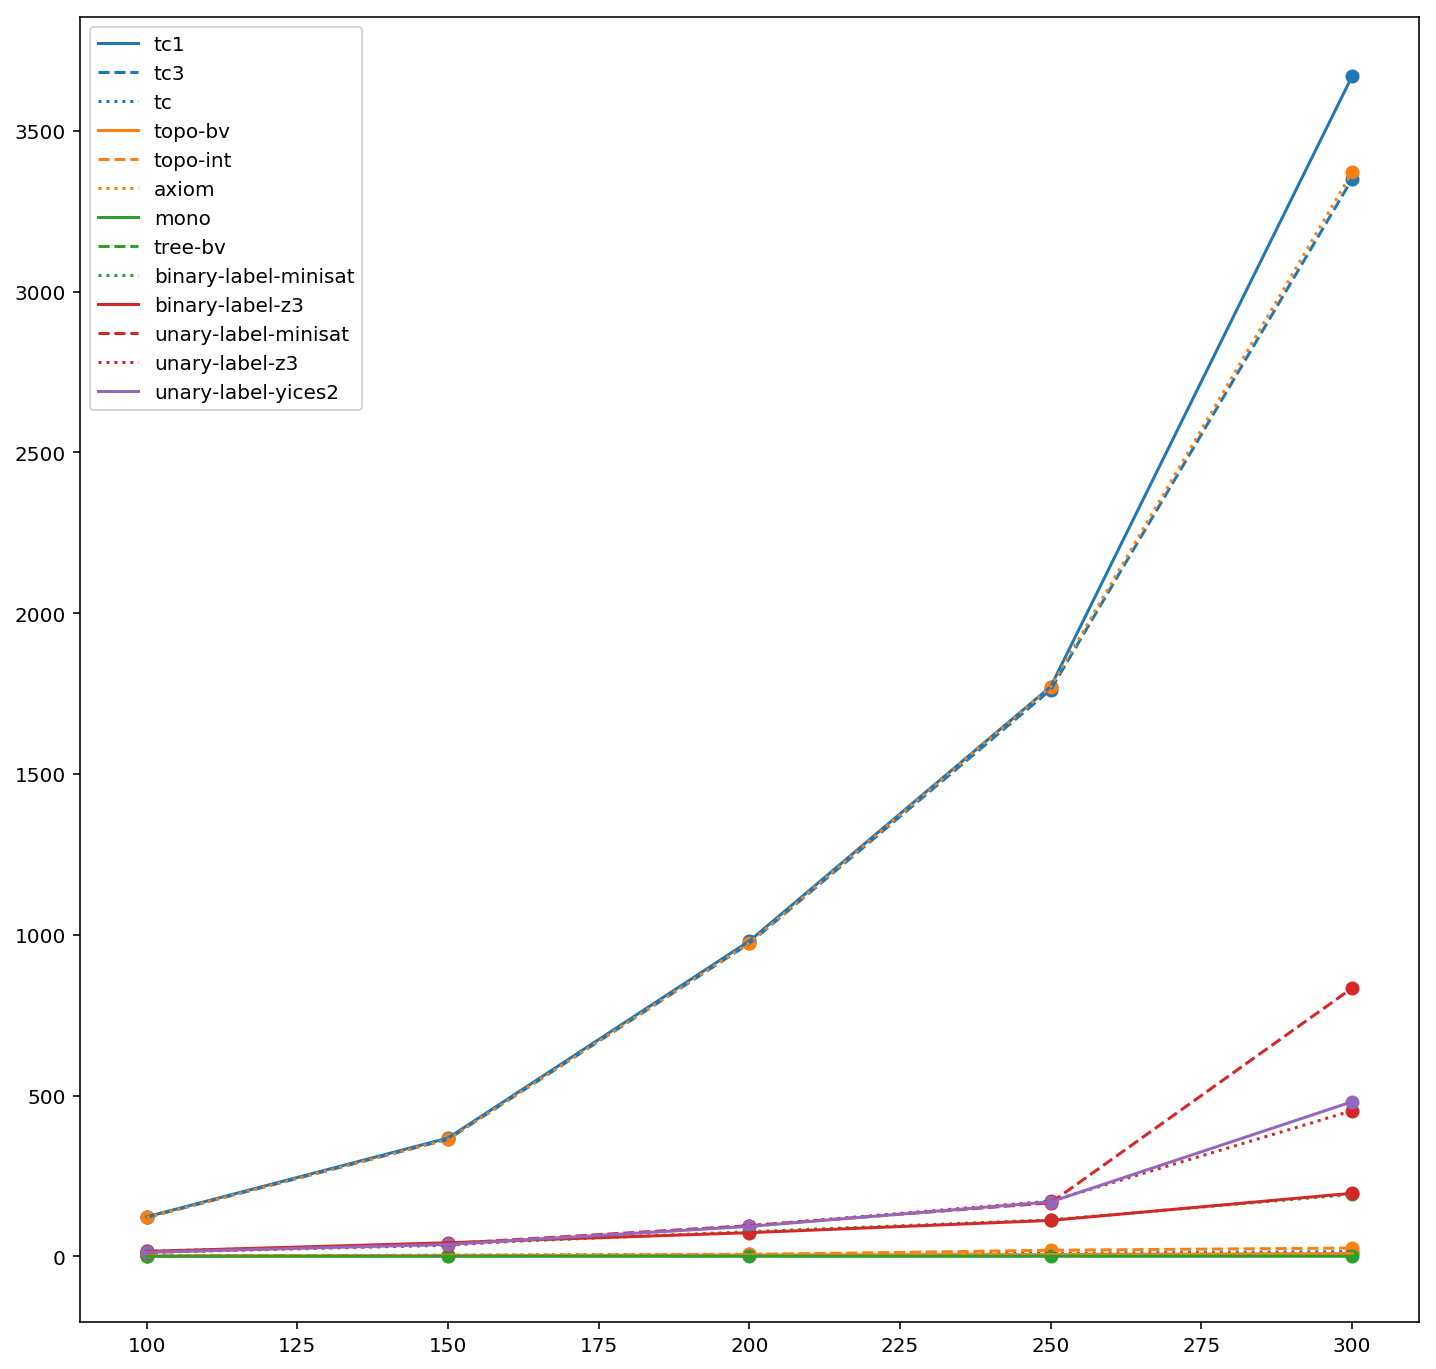

In [312]:
plot_encode_time_for_percent(results, 50)

In [308]:
def plot_solve_time_for_percent(results, read_percent=50, exclude=[]):
    fig, ax = plt.subplots(figsize=(12, 12))

    rows = encode_timing_for_percent(results, read_percent, 'solve')
    default_colors = cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
    ax.set_prop_cycle(default_colors * cycler(linestyle=['-', '--', ':',]))
#     cm = plt.get_cmap('gist_rainbow')
#     ax.set_prop_cycle(cycler(color=[cm(1.*i/len(rows)) for i in range(len(rows))]))
    
    for enc in rows:
        if not enc in exclude:
            timing = np.pad(rows[enc], (0, 5 - len(rows[enc])), 'constant', constant_values=(math.inf))
            ax.scatter(polygraph_sizes, timing)
            ax.plot(polygraph_sizes, timing, label=enc)
    
#     ax.set_yscale('log')
    ax.legend()

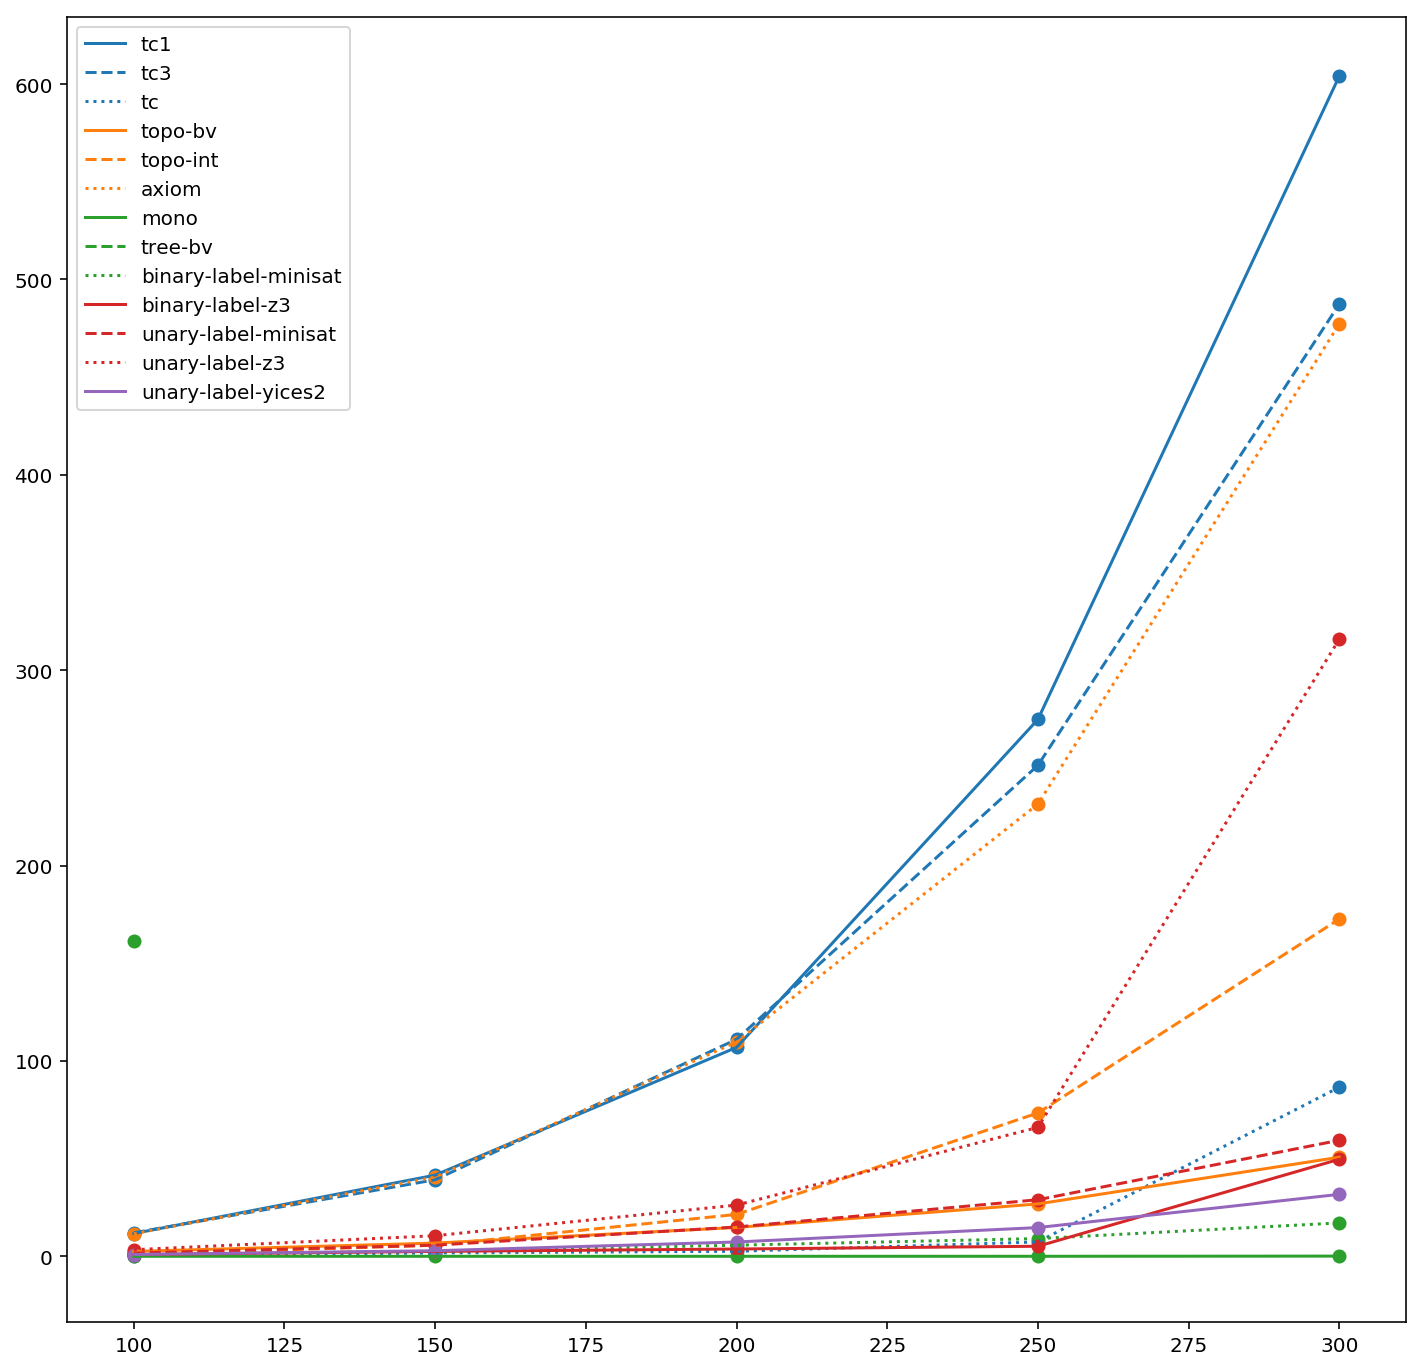

In [311]:
plot_solve_time_for_percent(results, 50)

In [ ]:
# number of clauses?